In [189]:
from numpy import *
from pandas import *
from matplotlib.pyplot import *
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [190]:
data=read_csv('airline.csv')
data.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1851922052,1981589524,1819357840,2390907400,2869879300,2985227800,3275176876,3567328452,3995859224,4498595500,...,17674051771,21138977885,22669623140,23788961574,25194297122,26793537042,28951304362,31054721219,33507639791,35890948340


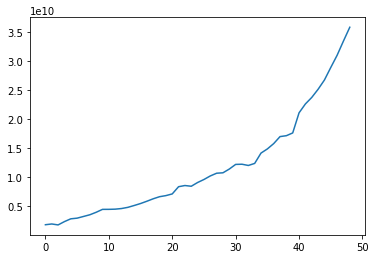

In [191]:
data=data.iloc[0].values
plot(data)
show()

In [192]:
data=data.reshape(-1,1).astype('float32')
data.shape

(49, 1)

In [193]:
scale=MinMaxScaler(feature_range=(0,1))
dataset=scale.fit_transform(data)
dataset.shape

(49, 1)

In [194]:
def creator (x,step):
    X,y=[],[]
    for i in range(len(x)-step-1): # -1 is vital to set the proper range
        X.append(x[i:(i+step),0])
        y.append(x[i+step,0])
    return X, y

def split(x,y,t_size=.3):
    pos=int(round(len(x)*(1-t_size)))
    xn,yn=x[:pos],y[:pos]
    xt,yt=x[pos:],y[pos:]
    return xn,yn,xt,yt,pos   

In [195]:
step=1
X,y=creator(dataset,step)
X,y=matrix(X),y
print(X.shape,shape(y))

(47, 1) (47,)


In [196]:
xn,yn,xt,yt,pos=split(X,y)
print(xn.shape,shape(yn),xt.shape,shape(yt))

(33, 1) (33,) (14, 1) (14,)


In [197]:
y=reshape(y,(-1,1))
yn=reshape(yn,(-1,1))
yt=reshape(yt,(-1,1))

In [198]:
print(xn.shape,xt.shape,y.shape,yn.shape,yt.shape)

(33, 1) (14, 1) (47, 1) (33, 1) (14, 1)


In [229]:
model=Sequential()
model.add(Dense(1,input_dim=1,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(xn,yn,epochs=65,batch_size=1)

Epoch 1/65
33/33 [==============================] - 1s 23ms/step - loss: 0.0053
Epoch 2/65
33/33 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 3/65
33/33 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 4/65
33/33 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5/65
33/33 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 6/65
33/33 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7/65
33/33 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 8/65
33/33 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 9/65
33/33 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 10/65
33/33 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11/65
33/33 [==============================] - 0s 2ms/step - loss: 9.5128e-04
Epoch 12/65
33/33 [==============================] - 0s 2ms/step - loss: 8.2874e-04
Epoch 13/65
33/33 [=====================

In [230]:
pred_n=model.predict(xn)
pred_t=model.predict(xt)

In [231]:
#model.evaluate(xn,yn,verbose=0)

In [232]:
pred_n=scale.inverse_transform(pred_n)
pred_t=scale.inverse_transform(pred_t)
n_y=scale.inverse_transform(yn)
t_y=scale.inverse_transform(yt)

In [233]:
print(math.sqrt(mean_squared_error(n_y,pred_n)))
print(math.sqrt(mean_squared_error(t_y,pred_t)))

301940106.1190456
1233054153.6982892


In [238]:
a=[pred_t[-1]]
b=model.predict(pred_t[-1])
for i in range(4):
    a.append(b)    
    b=model.predict(a[-1][0])    

In [239]:
a=reshape(a,(len(a),1))
print(a)

[[31753115648.0]
 [32134932480.0]
 [32521340928.0]
 [32912394240.0]
 [33308149760.0]]


In [240]:
pred_t[-1]

array([3.1753116e+10], dtype=float32)

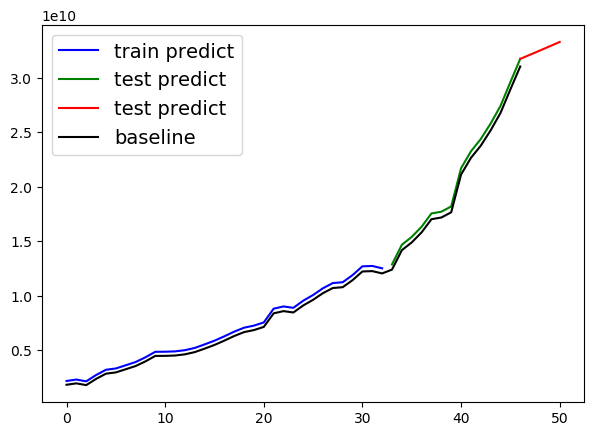

In [241]:
figure(figsize=(7,5),dpi=100)
plot(arange(len(dataset))[:pos],pred_n,c='b',label='train predict')
plot(arange(len(dataset))[pos:-2],pred_t,c='g',label='test predict')
plot(arange(len(dataset)+(len(a)-3))[-(len(a)):],a,c='r',label='test predict')
plot(scale.inverse_transform(X),c='k',label='baseline')
xlabel='year'
ylabel='no. of passenger'
legend(fontsize=14)
show()